# Artificial Neural Network (ANN) - Classification 1

Rafiq Islam  
2025-03-25

## Binary Classification

Say we have a dataset like this

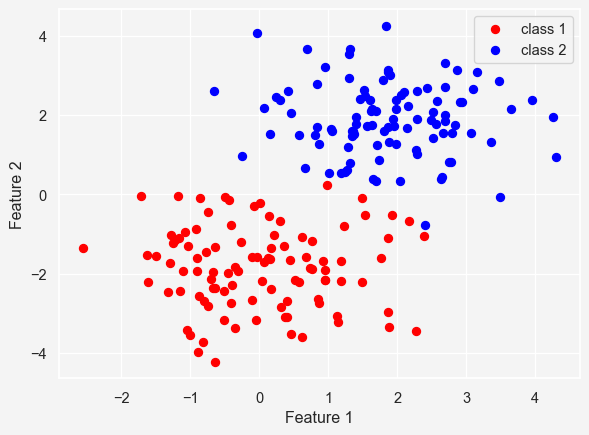

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mywebstyle import plot_style
plot_style('#f4f4f4')

np.random.seed(0)

cl1 = np.random.randn(100,2)+np.array([0,-2])
cl2 = np.random.randn(100,2)+np.array([2,2])

l1 = np.zeros((100,1))
l2 = np.ones((100,1))

d1 = np.hstack((cl1,l1))
d2 = np.hstack((cl2,l2))

data_np = np.vstack((d1,d2))
np.random.shuffle(data_np)
plt.scatter(
    data_np[data_np[:,2]==0][:,0],
    data_np[data_np[:,2]==0][:,1],
    color='red',
    label = 'class 1'
)
plt.scatter(
    data_np[data_np[:,2]==1][:,0],
    data_np[data_np[:,2]==1][:,1],
    color='blue',
    label = 'class 2'
)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

data = torch.tensor(data_np, dtype=torch.float32)

and we want to make an ANN classifier model with this data. So, we
consider a two layer neural network

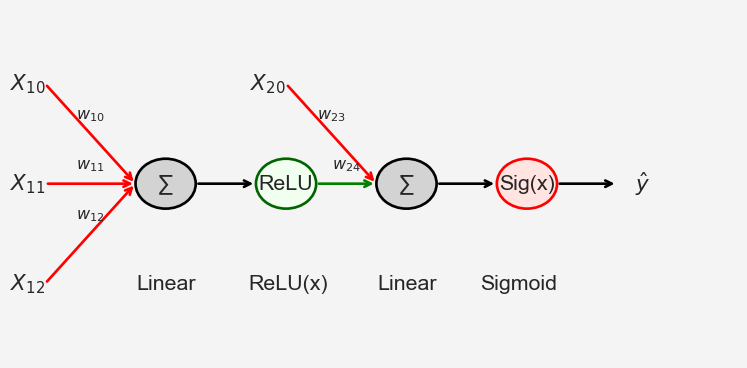

So our model

In [3]:
import torch.nn as nn

ANN_classifier = nn.Sequential(
    nn.Linear(2,1),                 # Input layer mapping R^2--> R
    nn.ReLU(),                      # Activation function in layer 1
    nn.Linear(1,1),                 # Output layer
    nn.Sigmoid()                    # Activation function in layer 2
)

Now let’s train the model and

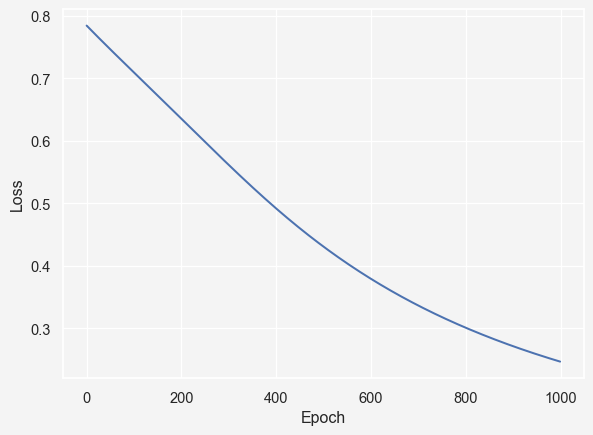

In [4]:
X = data[:,:-1]                     # X all rows, all columns except the last one
y = data[:, -1]                     # y all rows, only the last column
y = y.view(-1,1)
lr = 0.01                           # Learning Rate
loss_function = nn.BCELoss()        # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(        # Stochastic Gradient Descent Optimizer
    ANN_classifier.parameters(),
    lr=lr
)
num_epochs = 1000                   # Number of Epochs

# Define losses to store the loss from each epoch
losses = torch.zeros(num_epochs)
for epoch in range(num_epochs):
    # Forward Pass
    pred = ANN_classifier(X)

    # Compute loss
    loss = loss_function(pred, y)
    losses[epoch] = loss 

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(losses.detach())
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()